# INSURANCE
Insurance is a means of protection from financial loss. It is a form of risk management, primarily used to hedge against the risk of a contingent or uncertain loss.

An entity which provides insurance is known as an insurer, an insurance company, an insurance carrier or an underwriter. A person or entity who buys insurance is known as a policyholder, while a person or entity covered under the policy is called an insured. Policyholder and insured are often used as but are not necessarily synonyms, as coverage can sometimes extend to additional insureds who did not buy the insurance. The insurance transaction involves the policyholder assuming a guaranteed, known, and relatively small loss in the form of a payment to the insurer (a premium) in exchange for the insurer's promise to compensate the insured in the event of a covered loss. The loss may or may not be financial, but it must be reducible to financial terms. Furthermore, it usually involves something in which the insured has an insurable interest established by ownership, possession, or pre-existing relationship.

The insured receives a contract, called the insurance policy, which details the conditions and circumstances under which the insurer will compensate the insured, or their designated beneficiary or assignee. The amount of money charged by the insurer to the policyholder for the coverage set forth in the insurance policy is called the premium. If the insured experiences a loss which is potentially covered by the insurance policy, the insured submits a claim to the insurer for processing by a claims adjuster. A mandatory out-of-pocket expense required by an insurance policy before an insurer will pay a claim is called a deductible (or if required by a health insurance policy, a copayment). The insurer may hedge its own risk by taking out reinsurance, whereby another insurance company agrees to carry some of the risks, especially if the primary insurer deems the risk too large for it to carry.

Data Description
Problem Statement: Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [2]:
import pandas as pd
import numpy as np

path ='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
df= pd.read_csv(path)

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
#Data Exploration
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('*****************************************************')

policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
06-05-2007    2
15-11-1997    2
             ..
18-08-1990    1
27-06-1996    1
30-03-1995    1
03-08-2009    1
18-05-1993    1
Name: policy_bind_date, Length: 951, dtype: int64
*****************************************************
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
*****************************************************
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
*****************************************************
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
*****************************************************
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
*****************************************************
insured_occupation
machine-op-inspct    93
prof-

In [8]:
# dropping this column which is having lot of missing values
df.drop('_c39',axis=1,inplace=True)



In [9]:
# we can drop certain columns which doesnt make any impact on our model building
df.drop(['policy_number','incident_location'],axis=1,inplace=True)


In [10]:
# grouping numerical variables
num_vars = [y for y in df.columns if df[y].dtypes != 'O']
df[num_vars]

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,431289,0,0,20,1,0,1,87200,17440,8720,61040,2006
996,285,41,1000,1436.79,0,608177,70900,0,23,1,2,3,108480,18080,18080,72320,2015
997,130,34,500,1383.49,3000000,442797,35100,0,4,3,2,3,67500,7500,7500,52500,1996
998,458,62,2000,1356.92,5000000,441714,0,0,2,1,0,1,46980,5220,5220,36540,1998


In [11]:
# checking the value_counts of the certain features having symbol ?
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
?      360
NO     338
YES    302
Name: property_damage, dtype: int64
NO     343
?      343
YES    314
Name: police_report_available, dtype: int64


In [12]:
# replacing the character ? with mean of the feature

df['collision_type']=df['collision_type'].replace(
    to_replace='?', 
    value='Rear Collision', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['property_damage']=df['property_damage'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['police_report_available']=df['police_report_available'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')

In [13]:
import datetime

df['policy_year'] = pd.to_datetime(df.policy_bind_date,format='%d-%m-%Y')
df['incident_year'] = pd.to_datetime(df.incident_date, format='%d-%m-%Y')
df['policy_year'] = df['policy_year'].dt.strftime('%Y')
df['incident_year'] = df['incident_year'].dt.strftime('%Y')

In [14]:
df.drop(['policy_bind_date','incident_date','policy_year','incident_year'],axis=1,inplace=True)


In [15]:
import datetime

df['policy_year'] = pd.to_datetime(df.policy_bind_date,format='%d-%m-%Y')
df['incident_year'] = pd.to_datetime(df.incident_date, format='%d-%m-%Y')
df['policy_year'] = df['policy_year'].dt.strftime('%Y')
df['incident_year'] = df['incident_year'].dt.strftime('%Y')

AttributeError: 'DataFrame' object has no attribute 'policy_bind_date'

In [16]:
#CHECKING THE NULL VALUES
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_cl

In [17]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [18]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,...,0,No,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,...,1,No,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,...,3,No,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


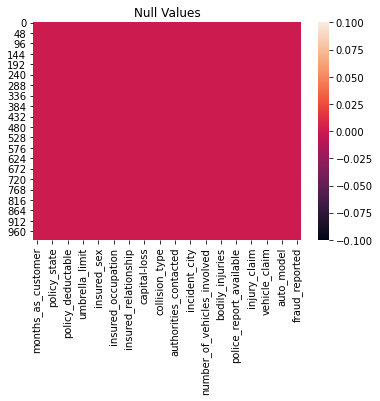

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [20]:
df.describe(include=['O'])

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,3,3,2,7,14,20,6,4,3,4,5,7,7,3,3,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,No,No,Suburu,RAM,N
freq,352,351,537,161,93,64,183,419,470,354,292,262,157,360,343,80,43,753


In [21]:
##Transforming the Data types of the Columns To Same DataTypes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [23]:
df.describe(include=['O']).T

,count,unique,top,freq
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354


In [24]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
for val in list1:
  df[val]=le.fit_transform(df[val].astype(str))
df.head().T

,0,1,2,3,4
months_as_customer,328.00,228.00,134.00,256.00,228.00
age,48.00,42.00,29.00,41.00,44.00
policy_state,2.00,1.00,2.00,0.00,0.00
policy_csl,1.00,1.00,0.00,1.00,2.00
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0.00,5000000.00,5000000.00,6000000.00,6000000.00
insured_zip,466132.00,468176.00,430632.00,608117.00,610706.00
insured_sex,1.00,1.00,0.00,0.00,1.00
insured_education_level,4.00,4.00,6.00,6.00,0.00


# EDA

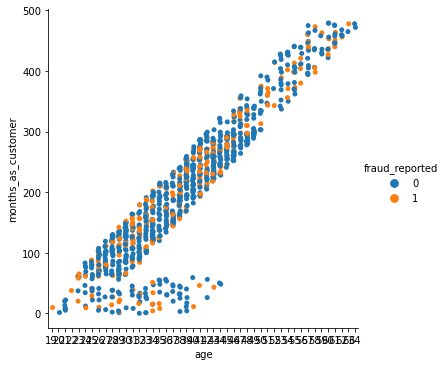

In [25]:
import seaborn as sns
sns.catplot(x='age',y='months_as_customer',data=df,jitter=True,hue='fraud_reported')


According to analysis, we have insured person of the age from 19 to 62 partnered with Banker for a minimum of 0 months to maximum of 500 months

So there are more number of Genuine cases who claim insurance and the months as a customer will gradually increases with the age of the insured suggesting that the insured is a Genuine customer & will not make any fraud claims

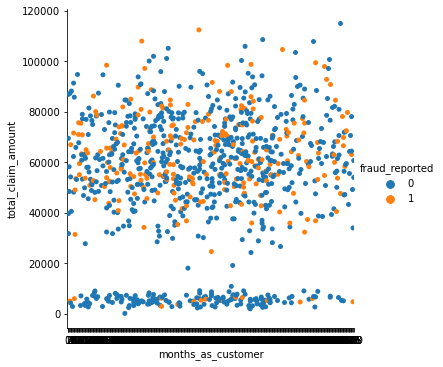

In [38]:
sns.catplot(x='months_as_customer',y='total_claim_amount',data=df,jitter=True,hue='fraud_reported')


The total_claim_amount claimed by the insurer as a customer ranges from 40000 to 10000 which includes both fraud as well as genuine customers. Another observation is that many of the Genuine customer as not yet claimed any amount but still pays to banker to be insured.

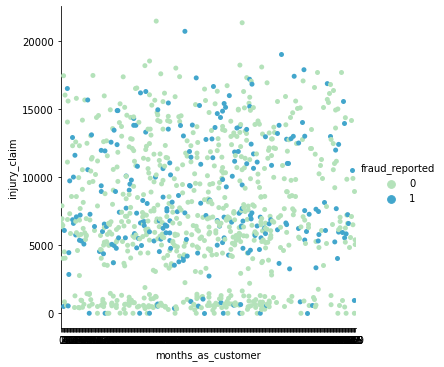

In [39]:
sns.catplot(x='months_as_customer',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')


If you like to see the age of the insured who has claimed injury claim, the figures is in the range 5000 to 20000 which are potentially Genuine insurer. there are still considerable number of fraud claims also which will get rejected by the banker if they are found fraud

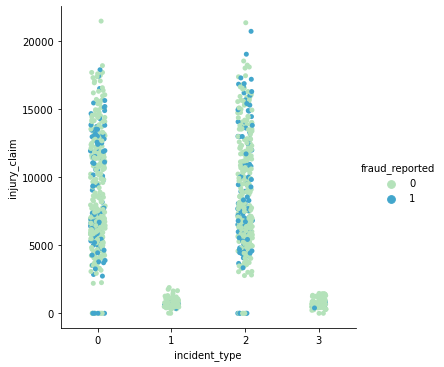

In [40]:
sns.catplot(x='incident_type',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')


Most of the fraud & genuine insurer claimed to be a victim of Single vehicle collision & Multi vehicle collision

In [ ]:
sns.catplot(x='total_claim_amount',y='injury_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')


In [ ]:
sns.catplot(x='months_as_customer',y='vehicle_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')


In [ ]:
sns.catplot(x='months_as_customer',y='property_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')


Property claims claimed by insurer ranges from 5000- 15000 in majority. and some minority genuine & fraud cases also claim beyond that
Even the insurer have passed months of time with the current Insurer,they still be considered as fraud because of the fraudulant records

In [ ]:
sns.catplot(x='total_claim_amount',y='property_claim',data=df,jitter=True,hue='fraud_reported',palette='GnBu')


In [ ]:
sns.catplot(x='vehicle_claim',y='total_claim_amount',data=df,jitter=True,hue='fraud_reported',palette='GnBu')


In [ ]:
# grouping numerical variables
num_vars = [y for y in df.columns if df[y].dtypes != 'O']
df[num_vars]


# plotting countplot

for i in num_vars:
    plt.figure(figsize=(6,6))
    sns.countplot(df[i],hue=df['fraud_reported'])
    plt.show()

There are more number of genuine customers than the fraudulant cases of age group of 19-62

Most of the incident has happened at 3 AM & 5 PM for genuine cases & most of the incident happened at 6 AM & 6 PM for fraud cases

Most of the incidents has only one vehicle involved for fraudulant & genuine cases. next comes 3 vehicles

Most of the body injuries has happened equally and there are no specific incident which caused injury to allover the body

In [ ]:
df.hist(figsize=(20,50),edgecolor='red',layout=(14,3),bins=15,legend=True)
plt.show()

In [ ]:
sns.boxplot(df)

# correlation 

In [ ]:
df.corr()


In [ ]:
# Coorelation with the Target Column Primary Fuel 

df.corr()['fraud_reported'].sort_values()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,17))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')


In [ ]:
##Descriptive Statistics
df.describe()

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')


In [ ]:
df.info()

In [ ]:
##Checking Data To Remove Skewness
df.iloc[:,:-1].skew()

In [ ]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)
df.iloc[:,:-1].skew()

In [ ]:
##Outliers Checking
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(3,13), figsize=[40,8])


###IQR Proximity Rule
Z - Score Technique

In [ ]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

In [ ]:
threshold=3
print(np.where(z>3))

In [ ]:
len(np.where(z>3)[0])

In [ ]:
df.drop([229, 248, 290, 763],axis=0)

In [ ]:
df=df[(z<3).all(axis=1)]
df.shape

In [ ]:
##Feature Engineering ( Variantion Inflation Factor )
from statsmodels.stats.outliers_influence import variance_inflation_factor
df.corr()

In [ ]:
plt.figure(figsize=(45,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [ ]:
df.isnull().sum()

In [ ]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']


In [ ]:
x

In [ ]:
y

In [ ]:
def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [ ]:
vif_calc()

In [ ]:
# Dropping the irrelevant columns..

x.drop(columns=["insured_zip","total_claim_amount"], axis=1, inplace=True)


In [ ]:
##Scaling the Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

##MODELLING 
Building CLASSIFICATION Model As Target Column's Has only Two Outputs

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['fraud_reported'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['fraud_reported'])
plt.show()

In [ ]:
#OverSampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)
y.value_counts()

In [ ]:
##Getting the best random state


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu*100," on Random_state ",maxRS)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


# Logistic Regression
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)

#Prediction
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog)*100)
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

In [ ]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_test,predlog)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Random Forest Classifier
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

In [ ]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Decission Tree Classifier
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

#Prediction
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc)*100)
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

In [ ]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [ ]:
Support Vector Machine Classifier
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc)*100)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))


In [ ]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

In [ ]:
Gradient Boosting Classifier
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB)*100)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

In [ ]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')

In [ ]:
#cv score for Logistic Regression
print(cross_val_score(log,x,y,cv=5).mean()*100)

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean()*100)

# cv score for Random Forest Classifier
print(cross_val_score(rf,x,y,cv=5).mean()*100)

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean()*100)

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean()*100)

#It is clear from the above that Random Forest Classifier is working the best with respect to Cross validation score as well which is minimum in the case..

So we move forward with Random Forest Classifier Model

###HyperParameter Tuning for the model with best score

In [ ]:
Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,7,8]}

In [ ]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Insurance =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Insurance.fit(x_train, y_train)
pred = Insurance.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

In [ ]:
##Plotting ROC and compare AUC for the final model
from sklearn.metrics import plot_roc_curve
plot_roc_curve(Insurance,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()


##Conclusion:
The accuracy score for Income is 96 %

In [ ]:
Saving the model
import joblib
joblib.dump(Insurance,"Census_Income.pkl")
